<a href="https://colab.research.google.com/github/DavidSenseman/BIO5853/blob/master/Lesson_01_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---------------------------
**COPYRIGHT NOTICE:** This Jupyterlab Notebook is a Derivative work of [Jeff Heaton](https://github.com/jeffheaton) licensed under the Apache License, Version 2.0 (the "License"); You may not use this file except in compliance with the License. You may obtain a copy of the License at

> [http://www.apache.org/licenses/LICENSE-2.0](http://www.apache.org/licenses/LICENSE-2.0)

Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.

------------------------

# **BIO5853: Biostatistics**

## **Lesson_01_5: Numerical Summary Measures**

##### **Module I: Variability**

* Instructor: [David Senseman](mailto:David.Senseman@utsa.edu), [Department of Integrative Biology](https://sciences.utsa.edu/integrative-biology/), [UTSA](https://www.utsa.edu/)

### Module 1 Material
* Part 1.1: Getting Started with Google COLAB
* Part 1.2: Python Basics 1 -- Syntax, Operators, Expressions
* Part 1.3: Python Basics 2 -- Functions, Variables, Strings
* Part 1.4: Python Basics 3 -- Charts
* **Part 1.5: Python Basics 4 -- Numerical Summary Measures**

#### In this assignment you will learn about:

* Mean
* Median
* Mode
* Range
* IQR
* Variance

### Google CoLab Instructions

The following code will map your GDrive to ```/content/drive``` and print out your Google GMAIL address.

In [1]:
# You must run this cell second
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    from google.colab import auth
    auth.authenticate_user()
    COLAB = True
    print("Note: using Google CoLab")
    %tensorflow_version 2.x
    import requests
    gcloud_token = !gcloud auth print-access-token
    gcloud_tokeninfo = requests.get('https://www.googleapis.com/oauth2/v3/tokeninfo?access_token=' + gcloud_token[0]).json()
    print(gcloud_tokeninfo['email'])
except:
    print("Note: not using Google CoLab")
    COLAB = False

Note: not using Google CoLab


## **Numerical Summary Measures**

This lesson follows Chapter 2.4 in your textbook, starting on page 34.

### **Mean**

The mean (also known as the average) summarizes an entire dataset with a single number representing its center point or typical value. To find the mean, simply add all the values and divide by the number of observations. The formula for the mean is:

$$ \overline{X} = \frac{1}{n} \sum_{n=1}^{n} X_i $$

Here:

$x_i$ represents each value in the dataset and $n$ is the total number of values.

## Example 1: Calculate mean 

Example 1 is divided into steps to make learning the Python code easier. 

In Example 1-Step A, we demonstrate how to use the **_Pandas_** package to read a datafile from an internet website and creating a datatype known as a **_DataFrame_**. We will use this code example throughout this course in nearly every lesson. 

---------------------------

### File handling with _Pandas_

**_Pandas_** is frequently used in Python programs to read unformated text file. File handling using Pandas typically involves reading in data from a file into a Pandas **_DataFrame_** using the `pd.read_csv(filename)` function. This function can be used to read in data from a variety of sources including CSV files, Excel files, HTML tables, and other formats. 

The function's name refers to a particularily common file type called a CSV (Comma Separated Values) file. In this file type, a comma **`,`** is used as the **_delimiter_** value, to **separate** one data value from another. 

--------------------------
 

### Example 1-Step A: Read datafile

The code in the cell below uses the Pandas function `pd.read_csv(filename)` to read the data file `pima.csv` stored on the course HTTPS server https://biologicslab.co. As the file is read, it is stored in a Pandas DataFrame called `pimaDF`. 

The code begins by "importing" the Pandas function and assigning it the alias `pd`. 

After the file is read and the DataFrame is created, we use the Python function `display()` to print out a portion of our new DataFrame to make sure it was read correctly. The code in the cell below shows how to use this method with the data stores in `pimaDF`. The `display()` function allows you to control the maximum rows and columns to print. This is useful since many datasets sets have large numbers of rows and columns which can be difficult to print to your computer screen. The code below sets the maximumn number of rows and columns to `6`. 

In [2]:
# Example 1-Step A: Read datafile

import pandas as pd

# Read the datafile 
pimaDF = pd.read_csv(
    "https://biologicslab.co/BIO5853/data/pima.csv",
   # index_col=0,
    na_values=['NA','?'])

# Set max rows and max columns
pd.set_option('display.max_rows', 6)
pd.set_option('display.max_columns', 6) 

# Display DataFrame
display(pimaDF)

,Pregnancies,Glucose,BloodPressure,...,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,...,0.627,50,1
1,1,85,66,...,0.351,31,0
2,8,183,64,...,0.672,32,1
...,...,...,...,...,...,...,...
765,5,121,72,...,0.245,30,0
766,1,126,60,...,0.349,47,1
767,1,93,70,...,0.315,23,0


If you code is correct, you should see the following table.

![____](https://biologicslab.co/BIO5853/images/Lesson_01_5/lesson_01_5_image01.png)

As you can see from the last line of the above table, the `pimaDF` DataFrame contains 768 rows and 9 columns. Each  column contains the value for one of 9 items of clinical information as follows:

* **Pregnancies:** Number of times pregnant
* **Glucose:** Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* **BloodPressure:** Diastolic blood pressure (mm Hg)
* **SkinThickness:** Triceps skin fold thickness (mm)
* **Insulin:** 2-Hour serum insulin (mu U/ml)
* **BMI:** Body mass index (weight in kg/(height in m)2)
* **DiabetesPedigree:** Diabetes pedigree function
* **Age: Age (years)**
* **Outcome:** Diagnosed with Type II Diabetes (`0`= no, `1` = yes)

Each row corresponds the data obtained for one subject in the dataset. In this example, the data were obtained from 768 women belonging to the Native American Indian tribe called the `Pima`. 

The Pima Indians are known for their high prevalence of Type 2 diabetes, making them an important population for studying and understanding the genetic and environmental factors that contribute to the development of diabetes. They have one of the highest rates of diabetes in the world, with some estimates suggesting that up to 50% of Pima adults have the disease.

### Example 1-Step B: Compute Mean

The code in the cell below, uses the Python packgage `statistics` to find the mean blood pressure of the 768 women in the Pima Indian dataset.  

The first step is to assign a variable to the correct column in the `pimaDF` DataFrame that contains the blood pressure values. The name of this column is `BloodPressure`. 

**WARNING** you must correctly enter the column name _exactly_ as it appears in the DataFrame, including capitalization. 

~~~text
# Create data variable
data = pimaDF.BloodPressure
~~~

The next step is to use the function `statistics.mean()` to compute the mean value and store it in a new variable called `meanBldPressure`. 

~~~text
# Compute mean
meanBldPressure=statistics.mean(data)
~~~

The last step is to print out the results using Python's `f` print statement.

In [3]:
# Example 1-Step B: Find mean

import statistics

# Create the data variable
data = pimaDF.BloodPressure

# Compute mean
meanBldPressure=statistics.mean(data)

# Print results
print(f"The mean blood pressure is {meanBldPressure:.2f} mmHg.")


The mean blood pressure is 69.11 mmHg.


If your code is correct you should see the following output:

~~~text
The mean blood pressure is 69.11 mmHg
~~~

### **Exercise 1-Step A: Read Datafile**

In the cell below, write the Python code to read the datafile `obesity_prediction.csv` stored on the course HTTPS server `https://biologicslab.co/BIO5853/data/` using the Pandas function `pd.read_csv(filename)`. Store the obesity prediction data in a new DataFrame called `obDF`. 

After the file is read and the DataFrame is created, use the Python function `display()` to print out a portion of your new DataFrame to make sure it was read correctly. Set the maximumn number of rows and columns to `6`. 

In [4]:
# Insert your code of Exercise 1-Step A here

import pandas as pd

# Read the datafile 
obDF = pd.read_csv(
    "https://biologicslab.co/BIO5853/data/obesity_prediction.csv",
    na_values=['NA','?'])

# Set max rows and max columns
pd.set_option('display.max_rows', 6)
pd.set_option('display.max_columns', 6) 

# Display DataFrame
display(obDF)

,Age,Gender,Height,...,BMI,PhysicalActivityLevel,ObesityCategory
0,56,Male,173.575262,...,23.891783,4,Normal weight
1,69,Male,164.127306,...,33.395209,2,Obese
2,46,Female,168.072202,...,25.817737,4,Overweight
...,...,...,...,...,...,...,...
997,49,Female,156.570956,...,32.146036,1,Obese
998,64,Male,164.192222,...,21.505965,4,Normal weight
999,66,Female,178.537130,...,23.517168,1,Normal weight


If you code is correct, you should see the following table.

![____](https://biologicslab.co/BIO5853/images/Lesson_01_5/lesson_01_5_image02.png)

As you can see from the last line of the above table, the `obDF` DataFrame contains 2111 rows and 17 columns. Each  column contains the value for one of 17 items of clinical information for 2111 subjects as follows:

* **Age:** The age of the individual, expressed in years.
* **Gender:** The gender of the individual, categorized as male or female.
* **Height:** The height of the individual, typically measured in centimeters (cm).
* **Weight:** The weight of the individual, typically measured in kilograms (kg).
* **BMI:** A calculated metric derived from the individual's weight and height
* **PhysicalActivityLevel:** This variable quantifies the individual's level of physical activity
* **ObesityCategory:** Categorization of individuals based on their BMI into different obesity categories

### **Exercise 1-Step B: Compute Mean**

In the cell below, use the Python packgage `statistics` to find the mean height of the men and women in the Obesity Prediction dataset. Store this value in a new variable called `meanHeight`.  

Print out your `meanHeight` using Python's `f` print statement. Make sure to add the correct units!

In [5]:
# Insert your code for Exercise 1-Step B here

import statistics

# Create the data variable
data = obDF.Height

# Compute mean
meanHeight=statistics.mean(data)

# Print results
print(f"The mean height is {meanHeight:.2f} cm.")


The mean height is 170.05 cm.


If your code is correct you should see the following output:

~~~text
The mean height is 170.05 cm.
~~~

## **Median**

The **_median_** is a measure of central tendency that represents the middle value in a dataset when it’s ordered from the highest to lowest value. It separates the lowest 50% from the highest 50% of values. Here’s how to find it manually:

**Odd-numbered dataset:**

* Order the values from low to high.
* Calculate the middle position using the formula:

$$ \text{Middle position} = \frac{n + 1}{2}$$
where $n$ is the number of values.
* The median is the value at the middle position.


**Even-numbered dataset:**
* Order the values.
* Calculate the two middle positions using the formulas:

$$\text{Middle position 1} = \frac{n}{2}$$  

> and

$$ \text{Middle position 2} = \frac{n}{2} + 1 $$

* Find the two middle values.
* Calculate the mean of these middle values to get the median.


The median is especially useful when dealing with skewed data or outliers, as it’s less affected by extreme values compared to the mean. It provides a robust estimate of the central value in a dataset.


### Example 2: Compute Median

The Python code in the cell below again uses the `statistics` package, this time to compute the median blood pressure value for the Pima Indian dataset. The median value is stored in a new variable, `medianBldPressure`. 

The `f` print function is used to print out both the median value as well as the mean value calculate above in Example 2B.


In [6]:
# Example 2: Compute median

import statistics

# Create the data variable
data = pimaDF.BloodPressure

# Calculate the median
medianBldPressure = statistics.median(data)

# Print the result
print(f"The median blood pressure is {medianBldPressure:.2f} mmHg")
print(f"The mean blood pressure is {meanBldPressure:.2f} mmHg")

The median blood pressure is 72.00 mmHg
The mean blood pressure is 69.11 mmHg


If the code is correct, you should see the following output:

~~~text
The median blood pressure is 72.00 mmHg
The mean blood pressure is 69.11 mmHg
~~~

As you can see the values for the median and the mean blood pressure are similar, but _not_ identical. This indicates that the blood pressures in the Pima Indian dataset is somewhat "left skewed"--a concept that we will explore later in this lesson. 

### **Exercise 2: Compute Median**

In the cell below use the `statistics` package to compute the median height for the dubjects in the Obesity Prediction dataset and store this value in a new variable called `medianHeight`. 

Use the `f` print function to print out both the median height value, as well as the mean height value that you computed earlier in **Exercise 2B**.


In [7]:
# Example 2: Compute median

import statistics

# Create the data variable
data = obDF.Height

# Calculate the median
medianHeight = statistics.median(data)

# Print the result
print(f"The median height is {medianHeight:.2f} cm.")
print(f"The mean height is {meanHeight:.2f} cm.")

The median height is 169.80 cm.
The mean height is 170.05 cm.


If the code is correct, you should see the following output:

~~~text
The median height is 169.80 cm.
The mean height is 170.05 cm.
~~~

As you can see the values for the median and the mean height are almost the same. This indicates that the height values in the Obesity Prediction dataset is close to being "normally distributed" --a concept that we will explore later in this course. 

## **Mode**

The **_mode_** represents the value that appears most frequently in a dataset. It’s a measure of central tendency that tells you the most common choice or characteristic within your sample. Here are some key points about the mode:

* **Unimodal:** A dataset can have one mode, where a single value occurs most often.
* **Bimodal:** If two different values repeat most frequently, the dataset is bimodal.
* **Trimodal:** With three modes, it’s trimodal.
* **Multimodal:** If there are four or more modes, it’s multimodal.

### Example 3: Compute Mode

The code in the cell below uses the `statistics` package to compute the mode for blood pressure in the Pima Indian dataset. The values for the mode, median and mean are printed out.

In [8]:
# Example 3: Compute mode

import statistics

# Create the data variable
data = pimaDF.BloodPressure

# Compute the mode
modeBldPressure = statistics.mode(data)

# Print the result
print(f"The mode blood pressure is {modeBldPressure:.2f} mmHg.")
print(f"The median blood pressure is {medianBldPressure:.2f} mmHg.")
print(f"The mean blood pressure is {meanBldPressure:.2f} mmHg.")

The mode blood pressure is 70.00 mmHg.
The median blood pressure is 72.00 mmHg.
The mean blood pressure is 69.11 mmHg.


If the code is correct, you should see the following output:

~~~text
The mode blood pressure is 70.00 mmHg.
The median blood pressure is 72.00 mmHg.
The mean blood pressure is 69.11 mmHg.
~~~

As you can see the values for the mode, median and mean blood pressure are again similar, but _not_ identical. 

### **Exercise 3: Compute Mode**

In the cell below, use the `statistics` package to compute the mode for height in the Obesity Prediction dataset. Store the mode value in a new variable called `modeHeight`. Print out the values for the mode, median and mean using the correct units of measure.

In [9]:
# Insert your code for Exercise 3 here

import statistics

# Create the data variable
data = obDF.Height

# Compute the mode
modeHeight = statistics.mode(data)

# Print the result
print(f"The mode height is {modeHeight:.2f} cm.")
print(f"The median height is {medianHeight:.2f} cm.")
print(f"The mean height is {meanHeight:.2f} cm.")

The mode height is 173.58 cm.
The median height is 169.80 cm.
The mean height is 170.05 cm.


If the code is correct, you should see the following output:

~~~text
The mode height is 173.58 cm.
The median height is 169.80 cm.
The mean height is 170.05 cm.
~~~

As you can see the values for the mode, median and mean height are again similar, but _not_ identical. In this particular dataset, the mode value is farther from both the median and the mean.  

## **Data Distributions**

You might be wondering why all the fuss about **_central tendency_** and why there are three different measures of central tendency? After all weren't the mean, median and mode values for blood pressure and height essentially the same in the above examples and exercises?

Consider the four different data distributions shown in **Figure 2.13** from your textbook (pg. 38):

![____](https://biologicslab.co/BIO5853/images/Lesson_01_5/lesson_01_5_image03.png)

As your textbook states on page 37:

> The best measure of central tendency for a given set of data often depends on the way in which  the values are distributed. If continuous or discrete measurements are symmetric and unimodal – meaning that, if we were to draw a histogram or a frequency polygon, there would be only one peak, as in the smoothed distribution pictured in **Figure 2.13(a)** – then the mean, the median, and the mode should all be roughly the same. If the distribution of values is symmetric but bimodal, so that the corresponding frequency histogram would have two peaks as in **Figure 2.13(b)**, then the mean and  median should again be the same. Note, however, that this common value could lie between the two peaks, and hence be a measurement that is extremely unlikely to occur. A bimodal distribution  often indicates that the population from which the values are taken actually consists of two distinct subgroups that differ in the characteristic being measured; in this situation, it might be better to report  two modes rather than the mean or the median, or to treat the two subgroups separately. The data in **Figure 2.13(c)** are skewed to the right, and those in **Figure 2.13(d)** are skewed to the left. When  the data are not symmetric, as in these two figures, the median is often the best measure of central tendency. Because the mean is sensitive to extreme observations, it is pulled in the direction of the  outlying data values. As a result, the mean might end up either excessively inflated or excessively  deflated. Note that when the data are skewed to the right, the mean lies to the right of the median;  when they are skewed to the left, the mean lies to the left of the median. In both instances, the mean is pulled in the direction of the extreme values.  Regardless of the measure of central tendency used in a particular situation, it can be misleading  to assume that this value is representative of all observations in the group.

## **Generating Data Distributions Using Python**

In the next section of this lesson, we demonstrate how to generate the four data distributions shown above in Figure 2.13 using three important Python packages: `Numpy`, `Matplotlib` and `Scipy`. 

### **The Numpy Package**

Numpy (pronounced as "num-pee") is a Python package that provides powerful data structures and functions for manipulating numerical data. It is the fundamental package for scientific computing with Python.

Like other Python packages, it has to be imported into a Python program with the following command before it can be used.
~~~text
import numpy as np
~~~
When importing software packages, an alias ('nickname') is often used. For example, the standard alias for Numpy is np. The Python package alias is a feature of the Python language that allows a software package to be imported under a different name. Another example of a package alias is pd which is the alias of the Python package called Pandas. One advantage of using an alias is that it shortens the length of commands that part of the package.

When using a method that is part of a Python package, the alias is used instead of the package name. For example, to use the Numpy `append()` method, the command would be:

~~~text
np.append(array,value,axis)
~~~
Numpy arrays are the main data structure used in this course when we preprocessing (preparing) data to be analyzed. Numpy arrays are N-dimensional objects that can hold any data type, including strings, although purely numeric arrays are most often encountered. 

In addition to providing a data structure, Numpy also provides a suite of mathematical functions and tools for working with these arrays. For example, Numpy provides a powerful linear algebra library for manipulating matrices and vectors. Numpy also provides a range of statistical functions that can be used for data analysis.


### **The Matplotlib Package**

**_Matplotlib_** is a comprehensive library for creating static, animated, and interactive visualizations in Python. It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits like Tkinter, wxPython, Qt, or GTK+.

Matplotlib can be used in Python scripts, the Python and IPython shells, Google COLAB, the Jupyter notebook, web application servers, and four graphical user interface toolkits. It supports many types of charts and graphs, including line plots, scatter plots, bar charts, histograms, pie charts, box plots, 3D charts, and more. It also supports mathematical notation and LaTeX-style formatting for text and labels.

#### **Matplotlib with Numpy**

Matplotlib can be used with Numpy to create powerful visualizations. Numpy can be used to provide data for Matplotlib to plot, manipulate, and transform. For example, you can use Numpy functions to generate random numbers, generate evenly spaced numbers over a specified interval, generate normally distributed numbers, and even perform linear algebraic operations. Matplotlib can then take this data and plot it in various ways, including line graphs, bar graphs, histograms, scatter plots, contour plots, and more. Together, Matplotlib and Numpy can be used to create powerful visualizations of data.

### **The Scipy Package**

The `scipy.stats` module in Python’s `SciPy` library provides a wide range of statistical functions and distributions. Here are some key features:

1. **Probability Distributions:**
It contains a large number of probability distributions (both continuous and discrete), such as normal, exponential, gamma, chi-squared, and more.
These distributions allow you to model and analyze random variables in various fields like physics, finance, and engineering.

2. **Summary Statistics and Tests:**
You can compute summary statistics (mean, median, variance, etc.) for your data using functions from this module.
It also offers statistical tests (e.g., t-tests, ANOVA) to assess hypotheses and compare groups.

3. **Correlation Functions:**
Functions for calculating correlation coefficients (Pearson, Spearman, Kendall) are available.
Useful for understanding relationships between variables.

### **Demonstration 2.13a: Normal Distribution**

**Figure 2.13a** in your textbook (and above) shows a unimodal distribution. In a unimodal distribution the mean, the median, and the mode should all be roughly the same value. In a special unimodal distribution known as a **_Normal Distribution_**, the mean and median are exactly the same value!  

The code in the cell below begins using the Numpy function `np.random.seed(42)`. Setting the random seed to a specific number, in this case `42` (see **Note** below). 

Setting the random seed in computer programs is essential for reproducibility. When you generate random numbers or perform any stochastic operations (like shuffling data), the outcome depends on the initial seed value. 

The code then uses the Numpy function `np.random.normal()` to generates a large Numpy array called `unimodal_data` containing a million random numbers (`size=1000000`), with a normal distribution having an average value = `5.0`.  

The Matplotlib function `plt.hist()` is then used to visualize the data values in this Numpy array by creating a frequency histogram. Additional `plt` functions are used to label the x-axis, the y-axis and the title.

------------------
**Note:** In _The Hitchhiker’s Guide to the Galaxy_ by Douglas Adams, the number 42 is famously known as the “Answer to the Ultimate Question of Life, the Universe, and Everything.” This answer was calculated by an enormous supercomputer named _Deep Thought_ over a period of 7.5 million years. However, the catch is that no one actually knows what the question is!

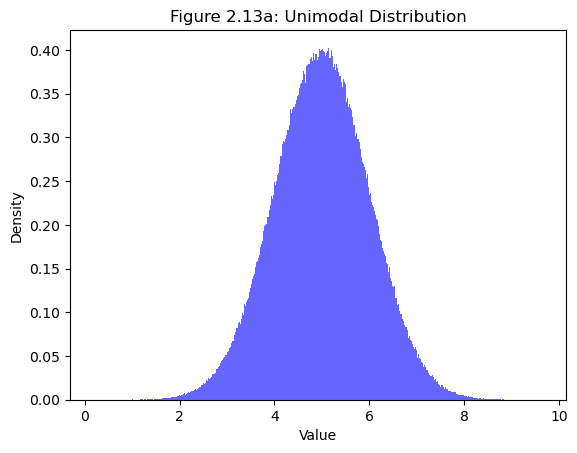

In [10]:
# Demonstration 2.13a: Unimodal (Normal) distribution

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Set random seed
np.random.seed(42)

# Generate data 
unimodal_data = np.random.normal(loc=5, scale=1, size=1000000)

# Plot the histogram
plt.hist(unimodal_data, bins=500, density=True, alpha=0.6, color='b')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Figure 2.13a: Unimodal Distribution')

# Show the plot
plt.show()

### Example 4: Compute Mean and Median using Numpy

When working with a Numpy array, you can easily compute their mean and median using Numpy's built-in statistical functions as illustrated in the code in the cell below. In this example, we are using the Numpy array `unimodal_data` that was generate in the above code cell.

In [11]:
# Example 4: Compute mean and median using Numpy

import numpy as np

# Compute mean and median using Numpy
meanUnimodal=np.mean(unimodal_data)
medianUnimodal=np.median(unimodal_data)

# Print results
# Print results
print(f"Unimodal data mean={meanUnimodal:.2f}")
print(f"Unimodal data median={medianUnimodal:.2f}")

Unimodal data mean=5.00
Unimodal data median=5.00


If the code is correct you should see the following output:

~~~text
Unimodal data mean=5.00
Unimodal data median=5.00
~~~

As expected, the mean and median are both equal to `5.00`.

### **Demonstration 2.13b: Bimodal Distribution**

If the distribution of values is symmetric but **_bimodal_**, so that the  corresponding frequency histogram would have two peaks as in **Figure 2.13(b)**, then the mean and median should again be the same. Note, however, that this common value will lie _between_ the two peaks, and hence be a measurement that is extremely unlikely to occur. In other words, using the mean or median to describe the central tendency of a bimodal dataset would be very misleading.

A bimodal distribution often indicates that the population from which the values are taken actually consists of two distinct subgroups that differ in the characteristic being measured. For instance, female black bears have an average weight of 175 pounds, while males average around 400 pounds, resulting in a bimodal distribution of weights. In this situation, it might be better to report two modes rather than the mean or the median, or to treat the two subgroups separately.  

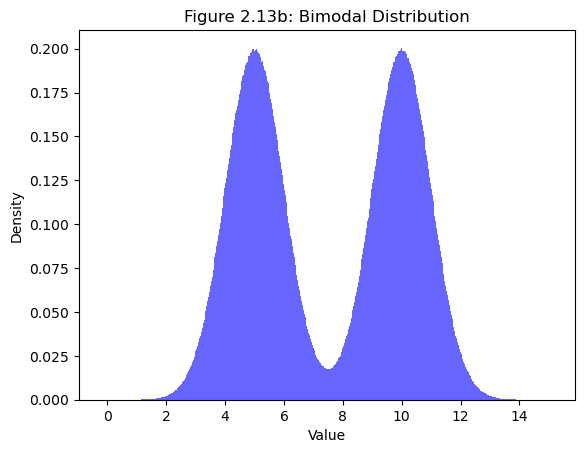

In [12]:
# Demonstration 2.13b: Biimodal distribution

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Generate data for two normal distributions (bimodal)
np.random.seed(42)
data1 = np.random.normal(loc=5, scale=1, size=10000000)
data2 = np.random.normal(loc=10, scale=1, size=10000000)

# Combine the two datasets
bimodal_data = np.concatenate([data1, data2])

# Plot the histogram
plt.hist(bimodal_data, bins=500, density=True, alpha=0.6, color='b')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Figure 2.13b: Bimodal Distribution')

# Show the plot
plt.show()

### **Exercise 4: Compute Mean and Median using Numpy**

Compute the mean and median of the Numpy array `bimodal_data` that was generated in the code cell above using Numpy's built-in statistical functions. Print out these two values.

In [13]:
# Insert your code for Exercise 4 here 

import numpy as np

# Compute mean and median using Numpy
meanBimodal=np.mean(bimodal_data)
medianBimodal=np.median(bimodal_data)

# Print results
print(f"Bimodal data mean={meanBimodal:.2f}")
print(f"Bimodal data median={medianBimodal:.2f}")

Bimodal data mean=7.50
Bimodal data median=7.50


If your code is correct you should see the following output:

~~~text
Bimodal data mean=7.50
Bimodal data median=7.50
~~~

### **Demonstration 2.13c: Right-skewed Distribution**

The data in **Figure 2.13(c)** are skewed to the right. When the data are not symmetric, as in this figure, the median is often the best measure of central tendency. Because the mean is sensitive to extreme observations, it is _pulled_ in the direction of the outlying data values. As a result, the mean ends up excessively inflated. Note that when the data are skewed to the right, the mean lies to the right of the median. 

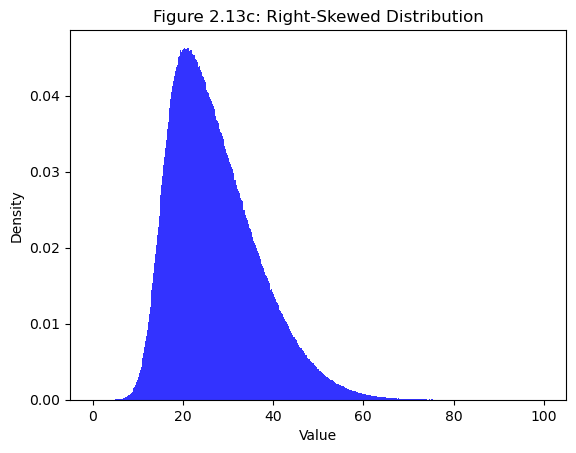

In [14]:
# Demostration 2.13c: Right-skewed distribution

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skewnorm


# Generate Right-skewed data
num_values = 10000000
max_value = 100
skewness = +5  # Positive values create right-skewed distribution

# Generate data using skewnorm
rightSkewed = skewnorm.rvs(a=skewness, loc=max_value, size=num_values)

# Shift the set so the minimum value is equal to zero
rightSkewed = rightSkewed - min(rightSkewed)

# Standardize all the values between 0 and 1
rightSkewed = rightSkewed / max(rightSkewed)

# Multiply the standardized values by the maximum value
rightSkewed = rightSkewed * max_value

# Plot histogram
plt.hist(rightSkewed, bins=500, density=True, color='b', alpha=0.8)

# Label plot
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Figure 2.13c: Right-Skewed Distribution')

# Show plot
plt.show()

### **Exercise 5: Left-skewed Distribution**

The data in **Figure 2.13(c)** are skewed to the right. When the data are not symmetric, as in this figure, the median is often the best measure of central tendency. Because the mean is sensitive to extreme observations, it is _pulled_ in the direction of the outlying data values. As a result, the mean ends up excessively inflated. Note that when the data are skewed to the right, the mean lies to the right of the median. 

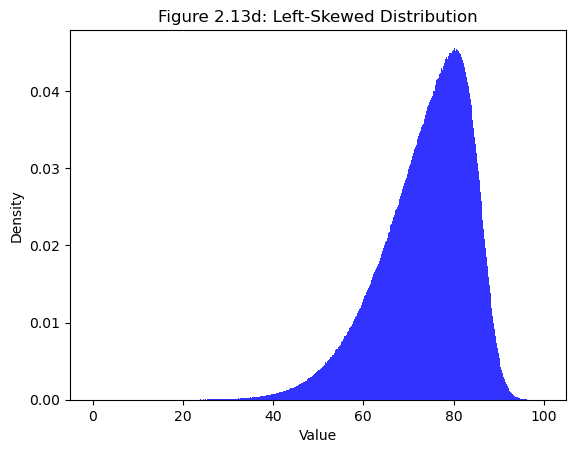

In [15]:
# Insert your code for Exercise 5 here

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skewnorm


# Generate Left-skewed data
num_values = 10000000
max_value = 100
skewness = -5  # Negative values create left-skewed distribution

# Generate data using skewnorm
leftSkewed = skewnorm.rvs(a=skewness, loc=max_value, size=num_values)

# Shift the set so the minimum value is equal to zero
leftSkewed = leftSkewed - min(leftSkewed)

# Standardize all the values between 0 and 1
leftSkewed = leftSkewed / max(leftSkewed)

# Multiply the standardized values by the maximum value
leftSkewed = leftSkewed * max_value

# Plot histogram
plt.hist(leftSkewed, bins=500, density=True, color='b', alpha=0.8)

# Label plot
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Figure 2.13d: Left-Skewed Distribution')

# Show plot
plt.show()

### **Demonstration 2.14: Two Normal Distributions**

Figure 2.13a shows a unimodal distribution. In a unimodal distribution the mean, the median, and the mode should all be roughly the same. In a special unimodal distribution known as a **_Normal Distribution_**, the mean, median and mode are all exactly the same value. 

The code in the cell below uses the Numpy function 

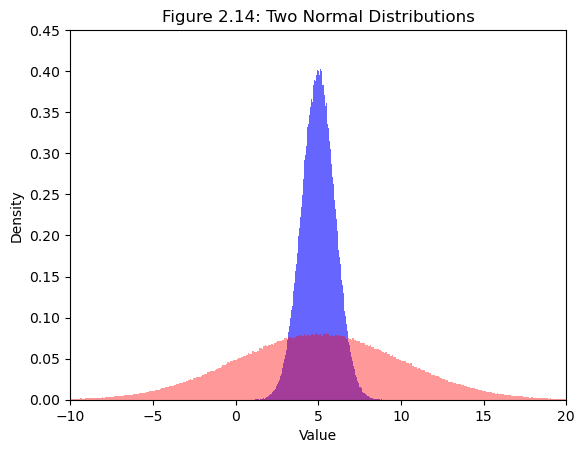

In [18]:
# Demonstration 2.14: Two Normal distributions

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Set random seed
np.random.seed(42)

# Generate data for two
data1 = np.random.normal(loc=5, scale=1, size=1000000)
data2 = np.random.normal(loc=5, scale=5, size=1000000)

# Plot the histogram
plt.hist(data1, bins=500, density=True, alpha=0.6, color='b')
plt.hist(data2, bins=500, density=True, alpha=0.4, color='r')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Figure 2.14: Two Normal Distributions')

plt.xlim(-10, 20)
plt.ylim(0, 0.45)

# Show the plot
plt.show()

## **Range**

The **_range_** represents the spread of data from the lowest to the highest value in a distribution. It’s a measure of variability that helps summarize the extent of differences within your dataset. 

**Importance of Range:**

* The range provides a quick overview of variability.
* When combined with measures of central tendency (like mean or median), it helps describe the span of the distribution.
* However, be cautious with outliers: A single extreme value can significantly affect the range.
* For a clearer picture of variability, consider using other measures like interquartile range or standard deviation alongside the range.

## **Interquartile Range**

The **_interquartile range_** (IQR) is a measure of statistical dispersion that tells you how spread out the data is within the middle half of your distribution. Here are the key points:

* **Definition:** The IQR represents the difference between the third quartile (Q3) and the first quartile (Q1).
* **Quartiles:** Quartiles divide an ordered dataset from low to high into four equal parts.
* **Q1:** The value below which 25% of the distribution lies.
* **Q3:** The value below which 75% of the distribution lies.

**Calculation:**

$$ \text IQR = Q3 - Q1 $$

* **Visualize:** Boxplots often display the IQR as the range between the box’s edges.

Remember, while the range gives you the spread of the entire dataset, the IQR focuses on the middle half

In [19]:
# Example 1: Read data file and create Pandas DataFrame

import pandas as pd

# Read the datafile 
asthmaDF = pd.read_csv(
    "https://biologicslab.co/BIO5853/data/asthma.csv",
    index_col=0,
    na_values=['NA','?'])

# Set max rows and max columns
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 8) 

# Display DataFrame
display(asthmaDF)

,subject_id,fev,sex
1,1,2.30,0
2,2,2.15,1
3,3,3.50,1
4,4,2.60,0
5,5,2.75,0
...,...,...,...
9,9,2.68,0
10,10,3.00,1
11,11,4.02,1
12,12,2.85,1


In [20]:
# Define a function to calculate IQR
def find_iqr(x):
    return np.subtract(*np.percentile(x, [75, 25]))

# Calculate IQR for 'fev' and 'sex' columns
iqr_col = asthmaDF[['fev', 'sex']].apply(find_iqr)

# Print
print(iqr_col)

fev    0.78
sex    1.00
dtype: float64


## **Variance and Standard Deviation**

Variance


$$  s^2 =  \frac{1}{2n(n-1)} \sum_{i=1}^{n} \sum_{j=1, j\not = i}^{n} (x_i - x_j)^2   $$

In [21]:
# Example 1: Read data file and create Pandas DataFrame

import pandas as pd

# Read the datafile 
cvDF = pd.read_csv(
    "https://biologicslab.co/BIO5853/data/centers_fev1.csv",
    index_col=0,
    na_values=['NA','?'])

# Set max rows and max columns
pd.set_option('display.max_rows', 6)
pd.set_option('display.max_columns', 6) 

# Display DataFrame
display(cvDF)

,center,fev1
1,1,3.23
2,1,3.47
3,1,1.86
...,...,...
58,3,2.43
59,3,3.20
60,3,3.53


In [22]:
# Mean

import statistics

x = cvDF.fev1

mean_x=statistics.mean(x)

print(f"The mean FEV1 is {mean_x:.2f} liters")


The mean FEV1 is 2.83 liters


In [23]:
x_error = x - xbar
print(x_error)

NameError: name 'xbar' is not defined

In [24]:
# Add up all the error terms 

# Compute 'manually'
sum_total_error= sum(x_error) 

print(f"The sum of all the errors is {sum_total_error:.2f}")

NameError: name 'x_error' is not defined

In [ ]:
# Compute list of squared errors 

# Compute each value
x_error_sq=(x - xbar)**2

# Print result
print("The list of squared errors computed 'manually':")
print(x_error_sq)

In [ ]:
# Compute variance 'manually'

# Equation for variance
var_x=sum(x_error_sq)/len(x_error_sq)

# Print result
print(f"The variance computed 'manually' is {var_x:.2f}")


In [ ]:
# Compute variance with a statistics package

import statistics

# Assign x to be fev1
x = cvDF.fev1

# Calculate the variance
variance_x = statistics.variance(x)

# Print the result
print(f"The variance computed with a statistics package is {variance_x:.2f}")

## **Standard Deviation**

Standard Deviation


$$ s = \sqrt{s^2} = \sqrt{ \frac{1}{(n-1)} \sum_{i=1}^{n} (x_i - \overline{x})^2 }   $$

In [ ]:
# Compute the standard deviation 'manually'

import math

# Take the square root of the variance
sd_x=math.sqrt(var_x)

# Print the result
print(f"The standard deviation computed 'manually' is {sd_x:.2f}")

In [ ]:
# Compute the standard deviation using a statistics package

import statistics

# Calculate the standard deviation
std_deviation_x = statistics.stdev(x)

# Print the result
print(f"The standard deviation computed with a statistics package is {std_deviation_x:.2f}")

### **Empirical Rule**

In [ ]:
# Example 1: Read data file and create Pandas DataFrame

import pandas as pd

# Read the datafile 
cholDF = pd.read_csv(
    "https://biologicslab.co/BIO5853/data/cholesterol.csv",
   # index_col=0,
    na_values=['NA','?'])

# Set max rows and max columns
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 10) 

# Display DataFrame
display(cholDF)

In [ ]:
print(x)

In [ ]:

import matplotlib.pyplot as plt

x=cholDF.totalchol

# the histogram of the data
n, bins, patches = plt.hist(x, 12, density=False, 
                            facecolor='#15466d',
                            edgecolor="white",
                            alpha=1.0)


plt.xlabel('Total Cholesterol (mg/dL)')
plt.ylabel('Number of subjects')
plt.title('FIGURE 2.16')
plt.xlim(0, 500)
plt.ylim(0, 1200)
plt.grid(False)
plt.show()

In [ ]:
# Example 1: Read data file and create Pandas DataFrame

import pandas as pd

# Read the datafile 
cigsDF = pd.read_csv(
    "https://biologicslab.co/BIO5853/data/number_cigs.csv",
    index_col=0,
    na_values=['NA','?'])

# Set max rows and max columns
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 10) 

# Display DataFrame
display(cigsDF)

In [ ]:

import matplotlib.pyplot as plt

x=cigsDF.cigpday1

# the histogram of the data
n, bins, patches = plt.hist(x, 12, density=False, 
                            facecolor='#15466d',
                            edgecolor="white",
                            alpha=1.0)


plt.xlabel('Number of cigarettes smoked per day')
plt.ylabel('Number of subjects')
plt.title('FIGURE 2.17')
plt.xlim(-5, 50)
plt.ylim(-100, 3000)
plt.grid(False)
plt.show()

In [ ]:
# Example 1: Read data file and create Pandas DataFrame

import pandas as pd

# Read the datafile 
shootDF = pd.read_csv(
    "https://biologicslab.co/BIO5853/data/mass_shootings.csv",
    index_col=0,
    na_values=['NA','?'])

# Set max rows and max columns
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 10) 

# Display DataFrame
display(shootDF)

In [ ]:
# Figure 2.18

import matplotlib.pyplot as plt

# Assign x
x=shootDF.fatalities

# Plot histogram of the data
n, bins, patches = plt.hist(x, 130, density=False, 
                            facecolor='k',
                            alpha=1.0)

plt.xlabel('Number of fatalities')
plt.ylabel('Number of shootings')
plt.title('FIGURE 2.17')
plt.xlim(-5, 150)
plt.ylim(-1, 20)
plt.grid(False)
plt.show()

In [ ]:
# Example 1: Read data file and create Pandas DataFrame

import pandas as pd

# Read the datafile 
deathsDF = pd.read_csv(
    "https://biologicslab.co/BIO5853/data/injury_death.csv",
    index_col=0,
    na_values=['NA','?'])

# Set max rows and max columns
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 10) 

# Display DataFrame
display(deathsDF)

In [ ]:
# Figure 2.18

import matplotlib.pyplot as plt

# Assign x
x=deathsDF.cause

# Plot histogram of the data
n, bins, patches = plt.hist(x, 5, density=False, 
                            facecolor='#15466d',
                            edgecolor="white",
                            alpha=1.0)

plt.xlabel('Number of fatalities')
plt.ylabel('Number of injury deaths')
plt.title('FIGURE 2.19')
plt.xlim(0.5, 5)
plt.ylim(-1, 60)
plt.grid(False)
plt.show()

In [ ]:
# Example 1: Read data file and create Pandas DataFrame

import pandas as pd

# Read the datafile 
bwDF = pd.read_csv(
    "https://biologicslab.co/BIO5853/data/birthweight.csv",
    index_col=0,
    na_values=['NA','?'])

# Set max rows and max columns
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 10) 

# Display DataFrame
display(bwDF)

In [ ]:
print(y)

In [ ]:
import matplotlib.pyplot as plt
# 
x = bwDF.midpoint
y = (bwDF.freq)*100

# plot
fig, ax = plt.subplots()

ax.bar(x, y, width=480, edgecolor="white",
       color='#294171',
       linewidth=0.7)

#ax.set_xlabel('Length (mm)')
ax.set_xlabel("Birth weight (grams)")
ax.set_ylabel("Relative frequency of infants (%)")

ax.set_title("FIGURE 2.20")
ax.set_xticks(x)

ax.set(xlim=(-100, 6000),
       ylim=(-1, 42))

plt.figure(figsize=(12,10))
plt.show()

In [ ]:
# Example 1: Read data file and create Pandas DataFrame

import pandas as pd

# Read the datafile 
hcDF = pd.read_csv(
    "https://biologicslab.co/BIO5853/data/hc_expenditures.csv",
    index_col=0,
    na_values=['NA','?'])

# Set max rows and max columns
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 10) 

# Display DataFrame
display(hcDF)

In [ ]:
# Figure 2.7

import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))

x=hcDF.per_capita
colors =['#919eb6']


flierprops = dict(marker='o', markerfacecolor='black', markersize=6,
                  markeredgecolor='none')
medianprops = dict(linestyle='-', linewidth=1.0, color='black')

# plot box plot
bplot=ax.boxplot(x, notch=False,
           flierprops=flierprops,
           medianprops=medianprops,
           patch_artist=True,
           widths=0.6)


ax.flierprops = dict(marker='o', markerfacecolor='black', markersize=8,
                  linestyle='none')

ax.set_title('FIGURE 2.21')

# fill with colors
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

ax.set_xticks([])
ax.set(ylim=(0, 12000))
ax.set_xlabel('')
ax.set_ylabel('Percapita Expenditure on Health Care')

plt.show()

In [ ]:
# Example 1: Read data file and create Pandas DataFrame

import pandas as pd

# Read the datafile 
cig_yrDF = pd.read_csv(
    "https://biologicslab.co/BIO5853/data/cigarettes_per_year.csv",
    index_col=0,
    na_values=['NA','?'])

# Set max rows and max columns
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 10) 

# Display DataFrame
display(cig_yrDF)

In [ ]:
# Figure 2.10

import matplotlib.pyplot as plt

# Assign x and y
x=cig_yrDF.year
y=cig_yrDF.number

fig, ax = plt.subplots()

# Plot line graph
plt.plot(x,y,c='k')

# Set properties
ax.set(xlim=(1900,2012))
ax.set_xlabel('Year')
ax.set_ylabel('Percapita Number of Cigarettes Smoked per Year')
ax.set_title("FIGURE 2.22")

# Show plot
plt.show()

In [ ]:
#

import numpy as np

data = np.array([[167, 150, 125, 120, 
                  150, 150, 40, 
                  136, 120, 150]])
hrDF = pd.DataFrame(data)

# Display DataFrame
display(hrDF)

In [ ]:
import pandas as pd

# Create a new DataFrame
data = {
    'Patient': ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'],
    'HeartRate': [167, 150, 125, 120, 150, 150, 40, 136, 120, 150]

}

hrDF = pd.DataFrame(data)

# Print the DataFrame
display(hrDF)

In [ ]:
# Figure 2.7

import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))

x=hrDF.HeartRate
colors =['#919eb6']


flierprops = dict(marker='o', markerfacecolor='black', markersize=6,
                  markeredgecolor='none')
medianprops = dict(linestyle='-', linewidth=1.0, color='black')

# plot box plot
bplot=ax.boxplot(x, notch=False,
           flierprops=flierprops,
           medianprops=medianprops,
           patch_artist=True,
           widths=0.6)


ax.flierprops = dict(marker='o', markerfacecolor='black', markersize=8,
                  linestyle='none')

ax.set_title('FIGURE 2.23')

# fill with colors
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

ax.set_xticks([])
ax.set(ylim=(-10, 200))
ax.set_xlabel('')
ax.set_ylabel('Heart Rate (beats per minute)')

plt.show()

In [ ]:
hrDF.describe()